<a href="https://colab.research.google.com/github/sherifarag/ml-project1/blob/main/Copy_of_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data management
import pandas as pd
import numpy as np
np.random.seed(0)
#from pandas_profiling import ProfileReport

#TextBlob Features
from textblob import TextBlob

#Plotting
import matplotlib.pyplot as plt

#SciKit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#nltk
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

#Tensorflow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Test
from collections import Counter

In [ ]:
#Training Data
path = "twitter_training.csv"
train_df = pd.read_csv(path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

#Test Data (Not to be used until the full model has been trained)
test_path = "twitter_validation.csv"
test_df = pd.read_csv(test_path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

FileNotFoundError: [Errno 2] No such file or directory: 'twitter_training.csv'

In [ ]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [ ]:
train_df.shape

In [ ]:
df = train_df.sample(frac=0.1)
df.reset_index(drop=True, inplace=True)

In [ ]:
#See overall information about the data frame
df.info()

In [ ]:
#Display a few entries
df.head()

<BarContainer object of 4 artists>

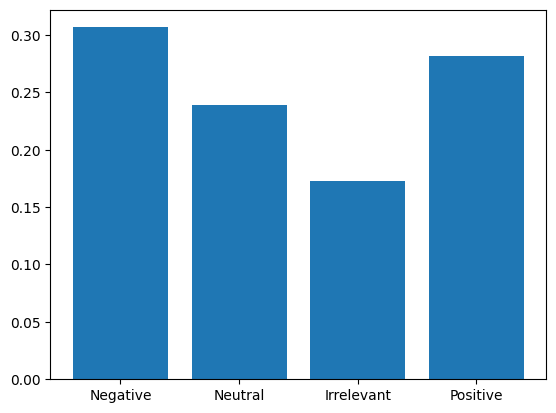

In [ ]:
#Checking balance of target classes
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) / len(df) for sentiment in sentiments]

plt.bar(sentiments, sentiment_nums)

In [ ]:
#Define the indexing for each possible label in a dictionary
class_to_index = {"Neutral":0, "Irrelevant":1, "Negative":2, "Positive": 3}

#Creates a reverse dictionary
index_to_class = dict((v,k) for k, v in class_to_index.items())

#Creates lambda functions, applying the appropriate dictionary
names_to_ids = lambda n: np.array([class_to_index.get(x) for x in n])
ids_to_names = lambda n: np.array([index_to_class.get(x) for x in n])

In [ ]:
#Test each function
print(names_to_ids(["Positive", "Negative", "Irrelevant", "Neutral"]))
print(ids_to_names([0,1,2,3]))

[3 2 1 0]
['Neutral' 'Irrelevant' 'Negative' 'Positive']


In [ ]:
#Convert the "Sentiment" column into indexes
df["Sentiment"] = names_to_ids(df["Sentiment"])

In [ ]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2535,Borderlands,2,@ Borderlands. Can we get a big fix please? I'...
1,11073,TomClancysGhostRecon,2,@GhostRecon You call 1.1.0 an update. You're h...
2,3024,Dota2,0,I'm excited to watch the EU's closed qualifyin...
3,6719,Fortnite,2,"anyways but my fortnite here,, im annoyed."
4,1533,Battlefield,2,Collateral with the revolver is so satisfying....


In [ ]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/usr/local/lib/python3.10/dist-packages/nltk/data', '/usr/local/lib/python3.10/dist-packages/nltk/data']


In [ ]:
!pip install nltk
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
nltk.data.path.append("/usr/local/lib/python3.10/dist-packages/nltk/data")

In [ ]:
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!python -m nltk.downloader wordnet

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!apt-get -qq install -y libarchive-dev

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pip install streamlit

In [ ]:
!streamlit hello




  Welcome to Streamlit. Check out our demo in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.8.10:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!


  Stopping...


In [ ]:
import streamlit as st
x = st.slider("Select a value")
st.write(x, "squared is", x * x)

In [ ]:
st.title("Sentiment Analysis Tool")
message = st.text_area("Please enter the text you want to analyze:")
if st.button("Analyze"):
    blob = TextBlob(message)
    result_sentiment = blob.sentiment.blob.sentiment
    st.success(result_sentiment)

In [ ]:
st.title("Sentiment Analysis")
st.write("This is a simple sentiment analysis app")

In [ ]:
import sys

sys.path.append("/path/to/utils/module")

In [ ]:
import streamlit as st
import joblib

In [ ]:
def analyze_tweet(tweet):
    model = joblib.load('model.joblib')
    result = model.predict([tweet])
    return result

tweet = st.text_input("Enter your tweet", key="tweet")

if st.button("Analyze"):
    result = analyze_tweet(tweet)
    st.write(result)

In [ ]:
!streamlit run streamlit_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: streamlit_app.py


In [ ]:
model = joblib.load('model.xgbpipe.joblib')

tweet = st.text_input("Enter your tweet", key="tweet")

if st.button("Analyze"):
    result = model.predict([tweet])
    st.write(result)

FileNotFoundError: [Errno 2] No such file or directory: 'model.xgbpipe.joblib'

In [ ]:
def remove_stopwords(ls):
    #Lemmatises, then removes stop words
    ls = [lemmatiser.lemmatize(word) for word in ls if word not in (stop_english) and (word.isalpha())]

    #Joins the words back into a single string
    ls = " ".join(ls)
    return ls

#Splits each string into a list of words
df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

#Applies the above function to each entry in the DataFrame
lemmatiser = WordNetLemmatizer()
stop_english = Counter(stopwords.words()) #Here we use a Counter dictionary on the cached
                                          # list of stop words for a huge speed-up
df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

In [ ]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Tweet_Content_Split
0,2535,Borderlands,2,@ Borderlands. Can we get a big fix please? I'...,Borderlands Can big fix I reset entire factory...
1,11073,TomClancysGhostRecon,2,@GhostRecon You call 1.1.0 an update. You're h...,GhostRecon You call update You laugh stay conn...
2,3024,Dota2,0,I'm excited to watch the EU's closed qualifyin...,I excited watch EU closed qualifying match EU ...
3,6719,Fortnite,2,"anyways but my fortnite here,, im annoyed.",fortnite annoyed
4,1533,Battlefield,2,Collateral with the revolver is so satisfying....,Collateral revolver unk


In [ ]:
#Define the Tokeniser
tokeniser = Tokenizer(num_words=10000, lower=True)

#Create the corpus by finding the most common
tokeniser.fit_on_texts(df["Tweet_Content_Split"])

In [ ]:
#Tokenise our column of edited Tweet content
tweet_tokens = tokeniser.texts_to_sequences(list(df["Tweet_Content_Split"]))

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Pad the sequences to make them the same length
tweet_tokens = pad_sequences(tweet_tokens, truncating = 'post', padding='post', maxlen=50)

# Convert the padded sequences to a NumPy array
tweet_tokens = np.array(tweet_tokens)

In [ ]:
tweet_tokens.shape

(7400, 50)

In [ ]:
#Remove dependent variable
y = df["Sentiment"]

#Drop all non-useful columns
df = pd.DataFrame(tweet_tokens)

In [ ]:
#Display final shape
df.shape

(7400, 50)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,16,input_length=50),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
h = model.fit(
     X_train, y_train,
     validation_data=(X_test, y_test),
     epochs=15,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)]
)

Epoch 1/15


KeyboardInterrupt: 

In [ ]:
#Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

#Assign labels to predictions and test data
y_pred_labels = ids_to_names(y_pred)
y_test_labels = ids_to_names(y_test)

InvalidArgumentError: Graph execution error:

Detected at node sequential_4_1/embedding_4_1/GatherV2 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-208-f9683eeb1c20>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 504, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 204, in one_step_on_data_distributed

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 194, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 92, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 846, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 209, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 202, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 155, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 592, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 846, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py", line 146, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 4850, in take

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1940, in take

indices[0,0] = 3 is not in [0, 0)
	 [[{{node sequential_4_1/embedding_4_1/GatherV2}}]] [Op:__inference_one_step_on_data_distributed_194096]

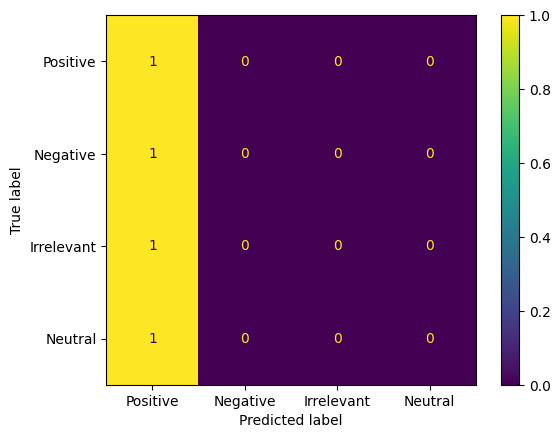

In [ ]:
y_unique = list(set(y_test_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()

In [ ]:
#Use the full dataset!
df = train_df

In [ ]:
#Convert the "Sentiment" column into indexes

##Train
df["Sentiment"] = names_to_ids(df["Sentiment"])
y = df["Sentiment"]

##Test
test_df["Sentiment"] = names_to_ids(test_df["Sentiment"])
y_test = test_df["Sentiment"]

In [ ]:
#Removing stopwords and lemmatising

##Train
#Splits each string into a list of words
df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

#Applies the above function to each entry in the DataFrame
lemmatiser = WordNetLemmatizer()
stop_english = Counter(stopwords.words()) #Here we use a Counter dictionary on the cached
                                          # list of stop words for a huge speed-up
df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

##Test
test_df["Tweet_Content_Split"] = test_df["Tweet_Content"].apply(word_tokenize)

test_df["Tweet_Content_Split"] = test_df["Tweet_Content_Split"].apply(remove_stopwords)

In [ ]:
#Tokenisation

#Define the Tokeniser
tokeniser = Tokenizer(num_words=10000, lower=True)

#Create the corpus by finding the most common
tokeniser.fit_on_texts(df["Tweet_Content_Split"])

##Train
#Tokenise our column of edited Tweet content
tweet_tokens = tokeniser.texts_to_sequences(list(df["Tweet_Content_Split"]))
tweet_tokens = pad_sequences(tweet_tokens, truncating = 'post', padding='post', maxlen=50)

##Test
#Tokenise our column of edited Tweet content
tweet_tokens_test = tokeniser.texts_to_matrix(list(test_df["Tweet_Content_Split"]))
tweet_tokens_test = pad_sequences(tweet_tokens_test, truncating = 'post', padding='post', maxlen=50)

In [ ]:
#Final prep

##Train
#Drop all non-useful columns
full_df = pd.DataFrame(tweet_tokens)

##Test
full_test_df = pd.DataFrame(tweet_tokens_test)

In [ ]:
#Original
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,16,input_length=50),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
h = model.fit(
     full_df, y,
     validation_data=(full_test_df, y_test),
     epochs=30,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)]
)

Epoch 1/30
  67/2313 ━━━━━━━━━━━━━━━━━━━━ 3:45 100ms/step - accuracy: 0.2789 - loss: 1.3773

KeyboardInterrupt: 

In [ ]:
#Generate predictions
y_pred = np.argmax(model.predict(full_test_df), axis=1)

#Assign labels to predictions and test data
y_pred_labels = ids_to_names(y_pred)
y_test_labels = ids_to_names(y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


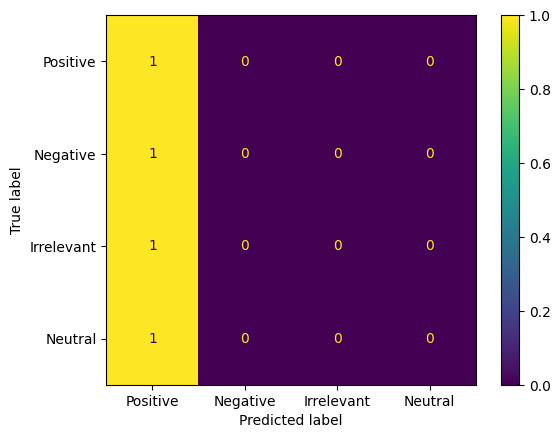

In [ ]:
y_unique = list(set(y_test_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()

In [ ]:
#To see the final accuracy
accuracy_score(y_test, y_pred)

0.277

In [ ]:
print(f"y_test size: {len(y_test)}")
print(f"y_pred size: {len(y_pred)}")


y_test size: 1000
y_pred size: 1000


In [ ]:
 from sklearn.preprocessing import StandardScaler
 from sklearn.svm import SVC
 # Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [ ]:
y_test = y_test[:len(y_pred)]

In [ ]:
y_unique = list(set(y_test))
cm = confusion_matrix(y_test, y_pred, labels = y_unique, normalize='true')

In [ ]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm_classifier.predict(X_test)


In [ ]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

Length of y_test: 1000
Length of y_pred: 1954


In [ ]:
print(f"shape of x_test: {X_test.shape}")

shape of x_test: (1954, 50)


In [ ]:
print(f"shape of y_test: {y_test.shape}")

shape of y_test: (1000,)


In [ ]:
print(f"shape of y_pred: {y_pred.shape}")

shape of y_pred: (1954,)


In [ ]:
y_pred = y_pred[:y_test.shape[0]]

In [ ]:
if y_test.shape[0] != y_pred.shape[0]:
    raise ValueError("y_test and y_pred have different number of samples.")

In [ ]:
y_test = y_test[:y_pred.shape[0]]

In [ ]:
if y_test.shape[0] != y_pred.shape[0]:
    raise ValueError("y_test and y_pred have different number of samples.")

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 43   0 176   6]
 [ 28   1 135   5]
 [ 47   1 254   5]
 [ 26   0 269   4]]


In [ ]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Confusion Matrix:
[[ 43   0 176   6]
 [ 28   1 135   5]
 [ 47   1 254   5]
 [ 26   0 269   4]]


In [ ]:
from sklearn.metrics import classification_report

# ... (rest of the code)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.19      0.23       225
           1       0.50      0.01      0.01       169
           2       0.30      0.83      0.45       307
           3       0.20      0.01      0.03       299

    accuracy                           0.30      1000
   macro avg       0.33      0.26      0.18      1000
weighted avg       0.30      0.30      0.20      1000



In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.19      0.23       225
           1       0.50      0.01      0.01       169
           2       0.30      0.83      0.45       307
           3       0.20      0.01      0.03       299

    accuracy                           0.30      1000
   macro avg       0.33      0.26      0.18      1000
weighted avg       0.30      0.30      0.20      1000



In [ ]:
# Train the SVM model
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)



In [ ]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (1000,)
Shape of y_pred: (1954,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
del RandomForestClassifier

In [ ]:
print(f"shape of y_test: {y_test.shape}")

shape of y_test: (1000,)


In [ ]:
print(f"shape of y_pred: {y_pred.shape}")

shape of y_pred: (1954,)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

NameError: name 'x' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Example data, replace with your actual data
X = ...  # Your feature matrix
y = ...  # Your target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Check the lengths of y_test and y_pred
print(f'Length of y_test: {len(y_test)}')
print(f'Length of y_pred: {len(y_pred)}')

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

TypeError: Singleton array array(Ellipsis, dtype=object) cannot be considered a valid collection.

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1000, 1954]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 1954]

In [ ]:
# Install the scikit-learn library
!pip install scikit-learn

# Import the RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)



In [ ]:
if len(y_test) != len(y_pred):
    raise ValueError("y_test and y_pred must have the same number of elements")

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

ValueError: y_test and y_pred must have the same number of elements

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1000, 1954]

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))



NameError: name 'RandomForestClassifier' is not defined

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=e8809262f89dd88447b602847dcfbbbe64deba79a8ce02d7d604e32101c54d23
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
!cp /path/to/utils/module.py .

cp: cannot stat '/path/to/utils/module.py': No such file or directory


AttributeError: module 'utils' has no attribute 'preprocess_tweet'

In [ ]:
import streamlit as st
import joblib

In [ ]:
import joblib

In [ ]:
model = joblib.load('model.joblib')

tweet = st.text_input("Enter your tweet", key="tweet")

if st.button("Analyze"):
    result = model.predict([tweet])
    st.write(result)

FileNotFoundError: [Errno 2] No such file or directory: 'model.joblib'

In [ ]:
def analyze_tweet(tweet):
    model = joblib.load('model.joblib')
    result = model.predict([tweet])
    return result

tweet = st.text_input("Enter your tweet", key="tweet")

if st.button("Analyze"):
    result = analyze_tweet(tweet)
    st.write(result)

In [ ]:
!pip install my_module

  Preparing metadata (setup.py) ... done
  Created wheel for my_module: filename=my_module-1.6.2-py3-none-any.whl size=1404 sha256=b70fcb9f90bac44e7f6409368fd3d2c83624c696e2567d991e11238f217c4e38
  Stored in directory: /root/.cache/pip/wheels/ea/6f/99/8a43d4d21ab49e14293e432ea3587ec33b41e6685c86f82a88
Successfully built my_module


In [ ]:
import my_module
xgbpipe = "model.joblib"

In [ ]:
import streamlit as st
import joblib

# Load the model
model = joblib.load(xgbpipe.joblib)

# Set the title of the app
st.title("Sentiment Analysis")

# Get the user input
tweet = st.text_input("Enter your tweet", key="tweet")

# Analyze the tweet when the button is clicked
if st.button("Analyze"):
    # Make a prediction
    result = model.predict([tweet])

    # Display the result
    st.write(f"Sentiment: {result[0]}")

# Display the session state
st.write(st.session_state)

AttributeError: 'str' object has no attribute 'joblib'

In [ ]:
model = joblib.load

In [ ]:
st.title("Sentiment Analysis")
st.text_input("Enter your tweet", key="tweet")

st.write(result)
st.write(st.session_state)

NameError: name 'result' is not defined

In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
import joblib

joblib.dump(model, 'model.pkl')

NameError: name 'model' is not defined